# Лабораторная работа №6 по курсу "Нейроинформатика".
Выполнил Пищик Е.С. М8О-406Б-19.

## Цель работы.

Исследование свойств слоя Кохонена, карты Кохонена, а также сетей векторного квантования, обучаемых с учителем, алгоритмов обучения, а также применение сетей в задачах кластеризации и классификации.

In [1]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
class SOM():
    def __init__(self, f, w, h):
        self.nodes = np.random.randn(w * h, f)
        self.ids = np.array([[x, y] for x in range(h) for y in range(w)])

    def update(self, inp, r, lr):
        bmu_dist = np.linalg.norm(self.nodes - inp, axis=1)
        bmu_ids = np.argmin(bmu_dist)

        nodes_dist = np.linalg.norm(self.ids - self.ids[bmu_ids], axis=1)

        for d, node in zip(nodes_dist, self.nodes):
            if d < r:
                influence = np.exp(-d / (2 * r))
                node += lr * influence * (inp - node)

In [3]:
def gen_train_data():
    data = []

    data += [0.3, 1.1]
    data += [-1.0, 0.7]
    data += [-0.5, -0.3]
    data += [-1.1, 0.9]
    data += [0.3, 0.7]
    data += [0.9, -1.3]
    data += [1.3, -0.1]
    data += [0.7, 0.7]
    data += [0.7, 0.7]
    data += [0.9, -1.1]
    data += [-0.2, 0.3]
    data += [1.2, 1.0]
    data += [1.1, 0.2]

    return data

In [4]:
epochs = 100
w, h, f = 64, 48, 2
r = init_r = int(max(w, h) / 2)
lr = init_lr = 1.0

In [5]:
model = SOM(w=w, h=h, f=f)
train_dataset = gen_train_data()

In [6]:
for epoch in tqdm(range(epochs)):
    np.random.shuffle(train_dataset)

    for inp in train_dataset:
        model.update(inp, r, lr)

    r = init_r + np.exp(-epoch / (epochs / np.log(init_r)))
    lr = init_lr + np.exp(-epoch / epochs)

100%|██████████| 100/100 [00:24<00:00,  4.03it/s]


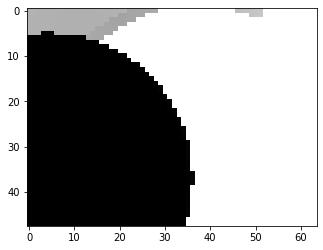

In [10]:
dot = np.dot(model.nodes[..., :2], [0.5, 0.5])
img = dot.astype(np.float32).reshape((h, w, 1)).repeat(3, axis=2)
img = np.clip(img, a_min=0.0, a_max=1.0)
img = plt.imshow(img, cmap='gray')

## Выводы.

В данной лабораторной работе мы научились работать с моделью карты Кохонена для задачи кластеризации.